In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
%matplotlib inline

pd.set_option('display.max_columns', 120)

In [17]:
with pd.HDFStore("/Users/rlx/datasets/twosigma/train.h5", "r") as train:
    df = train.get("train")
df.shape

(1710756, 111)

In [19]:
df.fillna(0, inplace=True)

In [138]:
gf = df.copy()#iloc[:4000]

In [140]:
gf = gf.set_index(['id', "timestamp"]).reindex()

In [141]:
gf.head()

,,derived_0,derived_1,derived_2,derived_3,derived_4,fundamental_0,fundamental_1,fundamental_2,fundamental_3,fundamental_5,fundamental_6,fundamental_7,fundamental_8,fundamental_9,fundamental_10,fundamental_11,fundamental_12,fundamental_13,fundamental_14,fundamental_15,fundamental_16,fundamental_17,fundamental_18,fundamental_19,fundamental_20,fundamental_21,fundamental_22,fundamental_23,fundamental_24,fundamental_25,fundamental_26,fundamental_27,fundamental_28,fundamental_29,fundamental_30,fundamental_31,fundamental_32,fundamental_33,fundamental_34,fundamental_35,fundamental_36,fundamental_37,fundamental_38,fundamental_39,fundamental_40,fundamental_41,fundamental_42,fundamental_43,fundamental_44,fundamental_45,fundamental_46,fundamental_47,fundamental_48,fundamental_49,fundamental_50,fundamental_51,fundamental_52,fundamental_53,fundamental_54,fundamental_55,fundamental_56,fundamental_57,fundamental_58,fundamental_59,fundamental_60,fundamental_61,fundamental_62,fundamental_63,technical_0,technical_1,technical_2,technical_3,technical_5,technical_6,technical_7,technical_9,technical_10,technical_11,technical_12,technical_13,technical_14,technical_16,technical_17,technical_18,technical_19,technical_20,technical_21,technical_22,technical_24,technical_25,technical_27,technical_28,technical_29,technical_30,technical_31,technical_32,technical_33,technical_34,technical_35,technical_36,technical_37,technical_38,technical_39,technical_40,technical_41,technical_42,technical_43,technical_44,y
id,timestamp,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
10,0,0.370326,-0.006316,0.222831,-0.213030,0.729277,-0.335633,0.113292,1.621238,-0.179404,0.00000,-0.072108,0.249187,0.024401,-0.127942,0.000000,1.412742,-0.029575,1.265246,-0.055747,1.592256,-0.285275,-0.212888,0.404180,0.116903,0.197590,-0.197455,-0.195023,-0.059886,-0.021199,-0.013555,-0.236371,-0.253357,0.575562,0.283947,-0.006208,0.616351,-0.034578,0.732652,-0.002432,-0.092508,-0.072185,0.447296,-0.194318,0.264373,0.018763,0.000000,-0.145278,-0.108547,0.148189,-0.226942,0.262864,-0.252933,-0.113265,0.180559,-0.033812,0.042951,-0.068031,0.208402,-0.082743,1.061059,1.120801,-0.228200,-0.119987,-0.131929,-0.145985,-0.155989,0.000000,0.037680,0.0,0.0,-2.0,0.0,0.0,-2.0,-0.273957,0.0,-2.0,-2.0,0.0,0.001652,-2.0,0.0,-2.0,0.0,0.652981,0.000000,-0.142453,0.0,0.0,0.0,1.427469,0.0,-2.0,0.0,0.0,0.0,0.0,0.0,0.937880,0.775208,0.0,0.0,0.0,-0.414776,0.0,0.0,-2.0,0.0,-0.011753
11,0,0.014765,-0.038064,-0.017425,0.320652,-0.034134,0.004413,0.114285,-0.210185,0.216281,0.09675,0.082042,-0.224383,-0.085529,0.024763,-0.062337,-0.202247,1.746692,-0.187505,-0.034664,-0.135177,0.305562,0.027595,-0.208746,0.118520,-0.123511,0.113818,0.000000,-0.115837,0.028282,0.076565,-0.217346,0.100054,0.358808,0.057505,0.025719,-0.141339,2.293476,0.024945,0.388208,-0.240927,-0.126232,-0.131619,0.232268,-0.001455,-0.489863,0.017317,0.027321,0.334183,0.113513,0.111536,-0.179379,0.221287,-0.091886,0.000000,0.107982,0.548687,-0.160079,-0.281368,0.063933,-0.235643,-0.205083,-0.194349,-0.365186,0.041928,-0.044907,-0.039079,-0.075000,-0.280418,0.0,0.0,-2.0,0.0,0.0,-2.0,-0.159432,0.0,0.0,-2.0,0.0,0.004317,0.0,0.0,-2.0,0.0,-0.399520,0.000000,-0.309356,-0.5,0.0,0.0,0.154613,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.232154,0.025590,0.0,0.0,0.0,-0.273607,0.0,0.0,-2.0,0.0,-0.001240
12,0,-0.010622,-0.050577,3.379575,-0.157525,-0.068550,-0.155937,1.219439,-0.764516,0.000000,0.00000,-0.051418,-0.258330,-0.122140,-0.121041,-0.058287,-0.899515,-0.022131,-0.079002,-0.031116,-0.100603,-0.341474,-0.007522,0.077977,-0.149581,0.036946,0.166182,0.000000,0.172751,0.961091,1.028205,-0.165369,0.056006,0.000000,0.249530,-0.156078,0.000000,0.019192,0.053364,-0.020247,0.000000,0.064028,-0.249106,-0.106216,-0.085509,0.383589,0.000000,-0.074021,-0.054295,-0.746073,-0.057605,-0.126238,0.462523,0.060902,0.000000,-0.262892,-0.059395,0.562975,-0.026392,0.013430,-0.627150,-0.470362,-0.101865,0.436794,-0.057049,-0.1208

In [205]:
fundamental_44, 1753


1424

In [647]:
asset=gf.index.levels[0].values[np.random.randint(len(gf.index.levels[0].values))]
print asset
print gf.ix[asset].shape
r = []
cols = [i for i in gf.ix[asset].columns if i!="y"]
n_diffs = 30
y   = gf.ix[asset]["y"].values
for col in cols:
    v   = gf.ix[asset][col]
    row = [np.corrcoef(v, y)[0,1]]
    for i in range(1,n_diffs+1):
        v = np.diff(v)
        row.append(np.corrcoef(v, y[i:])[0,1])
    r.append(row)
r = pd.DataFrame(r, columns=["corr_d.0"]+["corr_d."+str(i) for i in range(1, n_diffs+1)], index=cols)
r.fillna(0, inplace=True)


1798
(1745, 109)


correlation with differentials

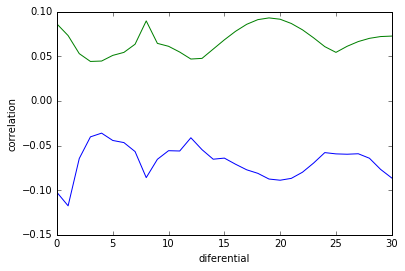

In [652]:
plt.plot(r.min(axis=0).values, label="min correlation")
plt.plot(r.max(axis=0).values, label="max correlation")
plt.xlabel("diferential")
plt.ylabel("correlation")

In [653]:
n_diff = int(np.argmax(r.max(axis=0)).split(".")[-1])
col  = np.argmax(r[np.argmax(r.max(axis=0))])
print "column with maximum correlation", col
print "number of differentials with max corr in that column", n_diffs

v   = gf.ix[asset][col]
for i in range(1,n_diff+1):
    v = np.diff(v)
np.corrcoef(v, y[n_diff:])[0,1], np.max(r.ix[col]), np.max(r["corr_d."+str(n_diff)])

column with maximum correlation technical_43
number of differentials with max corr in that column 30


(0.092934665788439896, 0.092934665788439896, 0.092934665788439896)

(0, 1726)

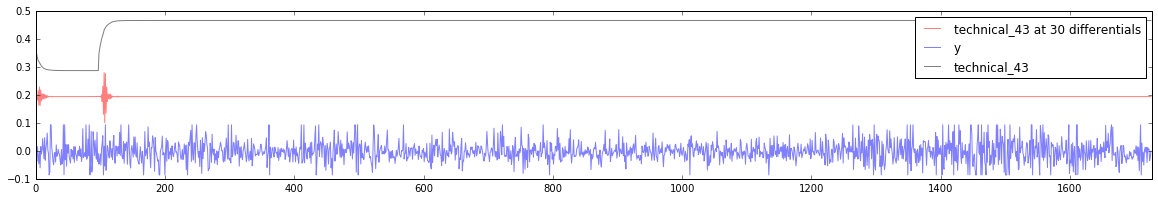

In [655]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
plt.figure(figsize=(20,3))
vs = MinMaxScaler(feature_range=(np.min(y), np.max(y))).fit_transform(v.reshape(-1,1))[:,0]
plt.plot(vs+np.max(y)*2, alpha=0.5, color="red", label=col+" at "+str(n_diffs)+" differentials")
plt.plot(range(len(y)-n_diff), y[n_diff:], alpha=0.5, color="blue", label="y")
s = MinMaxScaler(feature_range=(np.min(y), np.max(y))).fit_transform(gf.ix[asset][col].values[n_diff:].reshape(-1,1))[:,0]
plt.plot(s+np.max(y)*4, alpha=.5, color="black", label=col)
plt.legend()
plt.xlim(0,len(y)-n_diff)